In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

NUM_CLASSES = 8

CHANNELS = 3

IMAGE_RESIZE = 50

NUM_EPOCHS = 200

STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 80
BATCH_SIZE_VALIDATION = 30

BATCH_SIZE_TESTING = 1



In [3]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D, LeakyReLU
from keras.models import Sequential
from keras import optimizers




from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        'dataset/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'dataset/valid',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 



C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

Found 9348 images belonging to 8 classes.
Found 877 images belonging to 8 classes.


In [7]:
model = ResNet50(include_top=False)
x = model.output
x = GlobalAveragePooling2D()(x)
print(x)

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Tensor("global_average_pooling2d_1/Mean:0", shape=(?, 2048), dtype=float32)


In [24]:
from keras.models import load_model
test_generator = data_generator.flow_from_directory(
    directory = 'dataset/valid',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

test_generator.reset()
model=load_model("model_resnet50.hdf5")
pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

print(predicted_class_indices)

Found 877 images belonging to 8 classes.
877/877 [==============================] - 61s 70ms/step
[0 5 5 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 2 7 0 0 5
 0 0 0 0 0 0 0 0 2 0 0 5 5 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 5 0 0 0 0 5 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 0 5 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2
 5 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 7 2 2 2 2 2 2 2 2 2 7 7 2 2 2 2 5 2
 2 2 2 2 2 5 2 5 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 0 2 2 2 5 2 2 2 5 0 2
 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 5 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 7 2 2 2 5 5 5 2 2 7 2 2 2 2 5 7 7 0 0 2 2
 2 2 2 2 2 7 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2

In [40]:
validation_generator.reset()
pred1 = model.predict_generator(validation_generator, steps = len(validation_generator), verbose = 1)
predicted_class_indices1 = np.argmax(pred1, axis = 1)
#a=test_generator.class_indices.values()
#b=list(a)
print(predicted_class_indices1)

30/30 [==============================] - 11s 383ms/step
[2 5 0 0 2 2 0 0 0 2 5 2 0 2 5 0 0 0 0 2 2 5 0 5 0 2 2 0 0 0 2 2 2 5 2 2 2
 2 2 5 0 0 5 2 5 0 2 5 2 2 5 2 2 2 2 2 5 2 2 0 2 2 2 2 5 2 0 2 0 2 2 0 0 0
 2 7 2 2 2 0 2 0 0 0 2 0 0 2 2 2 2 5 2 0 2 0 0 0 2 0 5 2 2 0 5 2 2 0 2 5 2
 2 5 5 0 2 5 0 0 5 2 0 2 2 0 2 2 2 2 2 0 2 5 0 7 5 2 7 2 5 0 2 2 7 2 2 2 7
 2 5 2 0 2 2 2 2 2 2 5 2 2 2 2 2 2 7 2 0 2 2 2 2 5 0 2 0 2 0 0 2 5 2 0 2 2
 2 2 0 2 0 5 0 2 2 2 2 2 2 0 2 5 5 7 2 2 2 2 0 0 5 0 0 2 2 5 0 2 2 7 2 0 2
 0 2 2 2 0 2 0 5 0 2 2 0 5 0 5 2 2 0 0 2 0 0 2 2 2 5 2 2 0 2 2 5 0 5 5 0 2
 2 2 0 2 5 0 0 2 2 0 2 0 5 0 0 2 2 7 5 2 2 2 0 0 2 2 2 7 2 2 2 2 2 5 2 0 2
 0 0 2 2 5 0 0 0 2 2 0 2 5 0 0 0 2 2 2 2 2 0 0 2 2 2 5 2 5 0 0 2 0 2 0 2 0
 2 0 0 0 0 0 0 2 0 2 0 2 0 0 0 2 2 0 2 2 0 2 0 7 2 0 5 2 2 2 5 2 2 0 2 2 0
 0 5 5 5 2 5 2 2 5 7 2 0 2 5 2 0 2 2 2 0 2 2 2 2 5 5 2 2 0 2 2 2 0 2 2 0 2
 2 2 2 2 2 2 2 2 5 2 2 0 5 2 2 5 0 0 0 0 2 2 0 2 5 0 2 0 0 2 2 5 0 2 2 2 2
 2 0 2 0 0 0 2 2 5 0 2 0 7 2 0 2 2 0 2 2 0 5

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(predicted_class_indices1, predicted_class_indices)
clas_rep=classification_report(predicted_class_indices1, predicted_class_indices)
print(conf_mat)
print(clas_rep)

[[ 69 147  33   9]
 [141 244  69  12]
 [ 39  59  22   5]
 [  9  16   1   2]]
             precision    recall  f1-score   support

          0       0.27      0.27      0.27       258
          2       0.52      0.52      0.52       466
          5       0.18      0.18      0.18       125
          7       0.07      0.07      0.07        28

avg / total       0.38      0.38      0.38       877



In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

In [43]:
print ("Loss = " + str(pred[0][5]))
print ("Test Accuracy = " + str(pred[1][5]))

Loss = 0.27688462
Test Accuracy = 0.42988196


In [52]:
#plotting
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

    # Exporting plot image in PNG format.
    plt.savefig(f'D:/project_age_gender/try/plotted/{export_as}.png', bbox_inches='tight');

Normalized confusion matrix


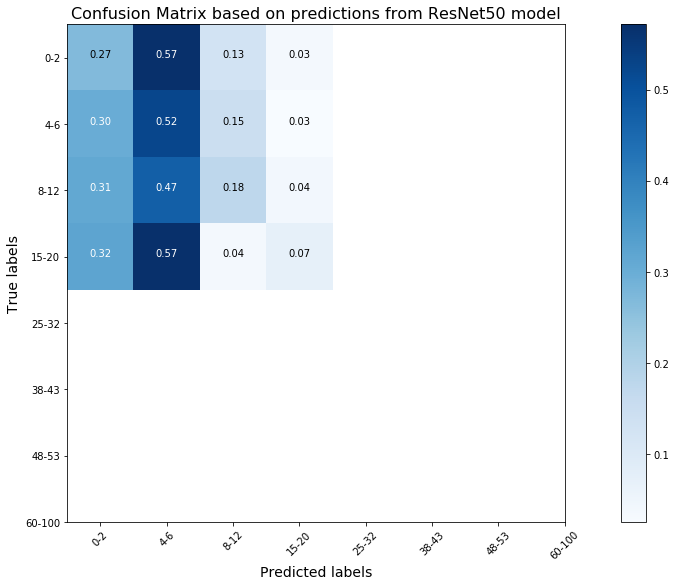

In [53]:
import itertools    
#plot_confusion_matrix()
cm_plot_labels = ['0-2', '4-6', '8-12', '15-20', '25-32', '38-43','48-53', '60-100']
plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat, cm_plot_labels, normalize=True,
                      title="Confusion Matrix based on predictions from ResNet50 model",
                      export_as="final_cnn_conf_mat_norm"
                     )

plt.show()